# **Izaz Khan**  
**Reg. No:** B23F0001AI029  
**Section:** AI Green  
**Course:** ML Lab 04  
**Date:** 02/10/2025  


##**Gradient Descent**
It is an optimization algorithm here I will use to minimize error by adjusting weights step by step in the opposite direction of the gradient until the model fits the data well

##**Batch Gradient Descent**

- Import **NumPy** for math operations.  
- `compute_gradients` finds how much to change weight (w) and bias (b) by checking errors.  
- In **Batch Gradient Descent**, I use the whole dataset at once to update w and b.  
- Start with w=0 and b=0, then repeat for many epochs.  
- In each step, calculate gradients (dw, db) and update using:  
  - w = w - lr * dw  
  - b = b - lr * db  
- Finally, the function returns the learned values of w and b.


In [3]:
import numpy as np

# Gradient function
def compute_gradients(X, y, w, b):
    m = len(y)
    predictions = w * X + b
    errors = predictions - y
    dw = (1/m) * np.sum(errors * X)
    db = (1/m) * np.sum(errors)
    return dw, db

# Batch Gradient Descent
def batch_gradient_descent(X, y, lr=0.01, epochs=100):
    w, b = 0.0, 0.0
    for i in range(epochs):
        dw, db = compute_gradients(X, y, w, b)
        w -= lr * dw
        b -= lr * db
    return w, b


##**Stochastic Gradient Descent**
- In **Stochastic Gradient Descent (SGD)**, I update weights using **one data point at a time**.  
- I start with w=0, b=0.  
- For each epoch, I loop through every sample (xi, yi).  
- I make prediction = w*xi + b.  
- I find error = prediction - yi.  
- I compute gradients (dw, db) and update:  
  - w = w - lr * dw  
  - b = b - lr * db  
- Since I update after each sample, learning is faster but has more noise compared to batch gradient descent.


In [4]:
def stochastic_gradient_descent(X, y, lr=0.01, epochs=100):
    w, b = 0.0, 0.0
    m = len(y)
    for i in range(epochs):
        for j in range(m):   # update using ONE sample at a time
            xi, yi = X[j], y[j]
            prediction = w * xi + b
            error = prediction - yi
            dw = error * xi
            db = error
            w -= lr * dw
            b -= lr * db
    return w, b


##**Mini-Batch Gradient Descent**

- In **Mini-Batch Gradient Descent**, I update weights using **small groups of data** instead of the whole dataset or just one sample.  
- I start with w=0, b=0.  
- For each epoch, I first shuffle the dataset to make training more random.  
- Then I split the data into small batches (size = batch_size).  
- For each batch, I calculate gradients (dw, db) using only that batch.  
- I update the values:  
  - w = w - lr * dw  
  - b = b - lr * db  
- This method is a balance: it is faster than batch gradient descent and more stable than stochastic gradient descent.


In [5]:
def mini_batch_gradient_descent(X, y, lr=0.01, epochs=100, batch_size=2):
    w, b = 0.0, 0.0
    m = len(y)
    for i in range(epochs):
        # shuffle data each epoch
        indices = np.random.permutation(m)
        X_shuffled, y_shuffled = X[indices], y[indices]

        for k in range(0, m, batch_size):  # take small batches
            X_batch = X_shuffled[k:k+batch_size]
            y_batch = y_shuffled[k:k+batch_size]

            # compute gradient on this batch
            dw, db = compute_gradients(X_batch, y_batch, w, b)
            w -= lr * dw
            b -= lr * db
    return w, b


### **Visualization**
- I create a small dataset where y = 2x + 3.  
- I train three models: Batch Gradient Descent, Stochastic Gradient Descent, and Mini-Batch Gradient Descent.  
- Each method gives me final values of w (slope) and b (intercept).  
- I print these values to compare.  
- For visualization, I first plot the original data points as black dots.  
- Then I draw three lines:  
  - Blue line = Batch GD  
  - Red dashed line = SGD  
  - Green dash-dot line = Mini-Batch GD  
- This plot helps me see how all methods try to fit the same straight line to the data.


Batch Gradient Descent:      w = 2.1158847017304687 , b = 2.581619456736265
Stochastic Gradient Descent: w = 2.240894382141118 , b = 2.0609207551546986
Mini-Batch Gradient Descent: w = 2.3659682806404025 , b = 1.6490952753000572


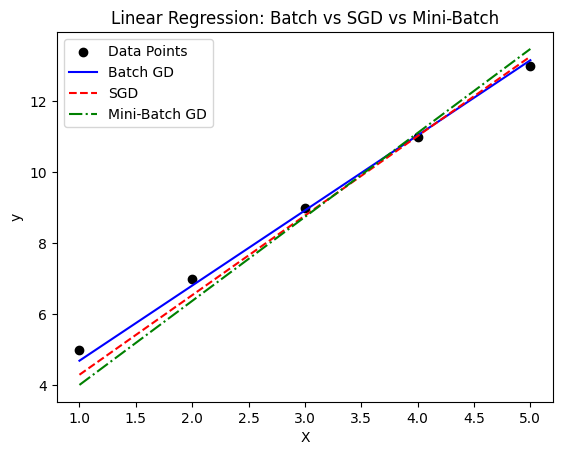

In [7]:
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])  # y = 2x + 3

w_b, b_b = batch_gradient_descent(X, y, lr=0.01, epochs=1000)
w_s, b_s = stochastic_gradient_descent(X, y, lr=0.01, epochs=100)
w_m, b_m = mini_batch_gradient_descent(X, y, lr=0.01, epochs=100, batch_size=2)

print("Batch Gradient Descent:      w =", w_b, ", b =", b_b)
print("Stochastic Gradient Descent: w =", w_s, ", b =", b_s)
print("Mini-Batch Gradient Descent: w =", w_m, ", b =", b_m)

# --- Visualization ---
plt.scatter(X, y, color="black", label="Data Points")

# Lines for each method
plt.plot(X, w_b*X + b_b, color="blue", label="Batch GD")
plt.plot(X, w_s*X + b_s, color="red", linestyle="--", label="SGD")
plt.plot(X, w_m*X + b_m, color="green", linestyle="-.", label="Mini-Batch GD")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Batch vs SGD vs Mini-Batch")
plt.legend()
plt.show()


### **Final Summary**

- In this lab, I implemented **three types of Gradient Descent** for linear regression:
  1. **Batch Gradient Descent** – I used the whole dataset at once to update weights. It is stable but slower.
  2. **Stochastic Gradient Descent (SGD)** – I updated weights using one sample at a time. It is faster but noisy.
  3. **Mini-Batch Gradient Descent** – I used small groups of data for updates. It is a balance between Batch and SGD.



- **Observation:** All three methods try to fit the same straight line (y = 2x + 3).  
  - Batch GD is smooth and accurate.  
  - SGD reaches the solution quickly but with fluctuations.  
  - Mini-Batch GD combines the speed of SGD with the stability of Batch GD.  


